In [2]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import time

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn import preprocessing

## Input Data

In [3]:
#Human

X_red = pd.read_csv("network_embeddings/human_avglog_20e.csv", header=None) ## change file name
nodes = pd.read_csv("data/human_nodes.csv", header=None) ## change file name

print (X_red.shape)
print (nodes.shape)

normalized = preprocessing.normalize(X_red) # Normalization

transform = TSNE  # PCA
trans = transform(n_components=2)
X2 = trans.fit_transform(normalized)

print (X2.shape)

(10791, 32)
(10791, 2)


/home/umair/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/umair/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(10791, 2)


In [9]:
        
# X_red = pd.read_csv("human_exp_data_avg.csv", header=None)

# print (X_red.shape)

# nodes = X_red.loc[:,1]
# X_red = X_red.drop([0,1], axis=1)

# print (nodes.shape)
# print (X_red.shape)

# normalized = preprocessing.normalize(X_red) # Normalization
# transform = TSNE  # PCA
# trans = transform(n_components=2)
# X2 = trans.fit_transform(normalized)

# print (X2.shape)

## Clustering Algorithms

D =  0.826
744 19 39.1578947368421
0.42385782077400724
160.40789750535606
0.86775413683912


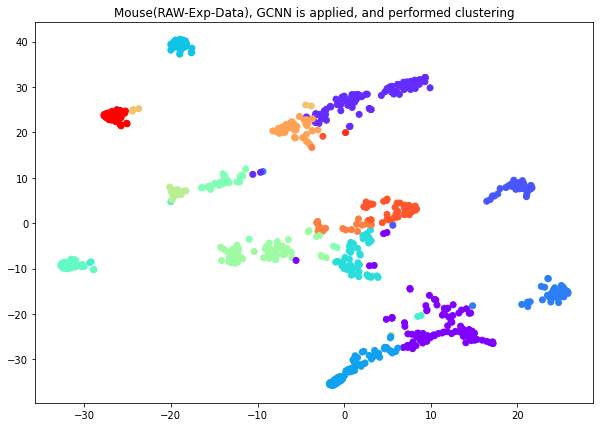

In [12]:
for i in range(826,827,2):
    j = i/1000.0
    print("D = ", j)
    clustering = AgglomerativeClustering(linkage='average',distance_threshold=j,n_clusters=None)
    X = clustering.fit(normalized)
    labels, counts = np.unique(X.labels_,return_counts=True)
    #print ((labels, counts))
    
    sum = 0
    for j in range(len(counts)):
        sum += counts[j]
    print (sum, len(counts),sum/len(counts))
    # Writing the clusters in proteins()
    f = open("clusters/human_cluster_explog.txt",'w') # change file name
    count=0

    # getting Protein-IDs from clusters and mapping IDs to Protein-Names 
    dt == 'explog'  # or 'only-exp'
    for i in labels:
        a = "cluster-"+str(i)+":"
        for j in range(len(X.labels_)):    
            if X.labels_[j] == i:
                if dt == 'only-exp':
                    if (len(a)<10+len(str(i))):
                        a = a + nodes[0] # + str(j)
                    else:
                        a = a + "," + nodes[0]
                else:
                    if (len(a)<10+len(str(i))):
                        a = a + nodes[1][j] # nodes[1][j]
                    else:
                        a = a + "," + nodes[1][j]

        a = a + "\n"
        f.write(a)
    f.close()

    print (metrics.silhouette_score(X_red, X.labels_, metric='euclidean')) ## cluster separation (-1 -> 1) closed to 1 is better
    print (metrics.calinski_harabasz_score(X_red, X.labels_)) ## higher is better
    print (metrics.davies_bouldin_score(X_red, X.labels_)) # lower score is better

    plt.figure(figsize=(10, 7))
    plt.scatter(X2[:,0], X2[:,1], c=X.labels_, cmap='rainbow')

#     plt.title("Human(Exp-log-Data), GCNN is applied, and performed clustering")
#     plt.savefig("human_clustering_explog.png")